In [1]:
import os, boto, requests, re
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
np.set_printoptions(threshold=np.nan)
from scipy.spatial.distance import pdist, jaccard, squareform, cosine, euclidean
from collections import Counter, OrderedDict
# import networkx as nx

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
mpl.rcParams.update({
    'font.size'           : 16.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'small',
    'ytick.labelsize'     : 'small',
    'legend.fontsize'     : 'small',})
%matplotlib inline

In [3]:
# cols = pd.read_csv('FileHeader') # first row contains column names
# List of all columns/features
# Commented columns not to load

cols = ['NPI',
 'Entity Type Code',
#  'Replacement NPI',
#  'Employer Identification Number (EIN)',
#  'Provider Organization Name (Legal Business Name)',
#  'Provider Last Name (Legal Name)',
#  'Provider First Name',
#  'Provider Middle Name',
#  'Provider Name Prefix Text',
#  'Provider Name Suffix Text',
 'Provider Credential Text',
#  'Provider Other Organization Name',
#  'Provider Other Organization Name Type Code',
#  'Provider Other Last Name',
#  'Provider Other First Name',
#  'Provider Other Middle Name',
#  'Provider Other Name Prefix Text',
#  'Provider Other Name Suffix Text',
#  'Provider Other Credential Text',
#  'Provider Other Last Name Type Code',
#  'Provider First Line Business Mailing Address',
#  'Provider Second Line Business Mailing Address',
#  'Provider Business Mailing Address City Name',
 'Provider Business Mailing Address State Name',
#  'Provider Business Mailing Address Postal Code',
#  'Provider Business Mailing Address Country Code (If outside U.S.)',
#  'Provider Business Mailing Address Telephone Number',
#  'Provider Business Mailing Address Fax Number',
#  'Provider First Line Business Practice Location Address',
#  'Provider Second Line Business Practice Location Address',
#  'Provider Business Practice Location Address City Name',
#  'Provider Business Practice Location Address State Name',
#  'Provider Business Practice Location Address Postal Code',
#  'Provider Business Practice Location Address Country Code (If outside U.S.)',
#  'Provider Business Practice Location Address Telephone Number',
#  'Provider Business Practice Location Address Fax Number',
#  'Provider Enumeration Date',
#  'Last Update Date',
#  'NPI Deactivation Reason Code',
 'NPI Deactivation Date',
 'NPI Reactivation Date',
 'Provider Gender Code',
#  'Authorized Official Last Name',
#  'Authorized Official First Name',
#  'Authorized Official Middle Name',
#  'Authorized Official Title or Position',
#  'Authorized Official Telephone Number',
 'Healthcare Provider Taxonomy Code_1',
#  'Provider License Number_1',
#  'Provider License Number State Code_1',
 'Healthcare Provider Primary Taxonomy Switch_1',
 'Healthcare Provider Taxonomy Code_2',
#  'Provider License Number_2',
#  'Provider License Number State Code_2',
 'Healthcare Provider Primary Taxonomy Switch_2',
 'Healthcare Provider Taxonomy Code_3',
#  'Provider License Number_3',
#  'Provider License Number State Code_3',
 'Healthcare Provider Primary Taxonomy Switch_3',
 'Healthcare Provider Taxonomy Code_4',
#  'Provider License Number_4',
#  'Provider License Number State Code_4',
 'Healthcare Provider Primary Taxonomy Switch_4',
 'Healthcare Provider Taxonomy Code_5',
#  'Provider License Number_5',
#  'Provider License Number State Code_5',
 'Healthcare Provider Primary Taxonomy Switch_5',
 'Healthcare Provider Taxonomy Code_6',
#  'Provider License Number_6',
#  'Provider License Number State Code_6',
 'Healthcare Provider Primary Taxonomy Switch_6',
 'Healthcare Provider Taxonomy Code_7',
#  'Provider License Number_7',
#  'Provider License Number State Code_7',
 'Healthcare Provider Primary Taxonomy Switch_7',
 'Healthcare Provider Taxonomy Code_8',
#  'Provider License Number_8',
#  'Provider License Number State Code_8',
 'Healthcare Provider Primary Taxonomy Switch_8',
 'Healthcare Provider Taxonomy Code_9',
#  'Provider License Number_9',
#  'Provider License Number State Code_9',
 'Healthcare Provider Primary Taxonomy Switch_9',
 'Healthcare Provider Taxonomy Code_10',
#  'Provider License Number_10',
#  'Provider License Number State Code_10',
 'Healthcare Provider Primary Taxonomy Switch_10',
 'Healthcare Provider Taxonomy Code_11',
#  'Provider License Number_11',
#  'Provider License Number State Code_11',
 'Healthcare Provider Primary Taxonomy Switch_11',
 'Healthcare Provider Taxonomy Code_12',
#  'Provider License Number_12',
#  'Provider License Number State Code_12',
 'Healthcare Provider Primary Taxonomy Switch_12',
 'Healthcare Provider Taxonomy Code_13',
#  'Provider License Number_13',
#  'Provider License Number State Code_13',
 'Healthcare Provider Primary Taxonomy Switch_13',
 'Healthcare Provider Taxonomy Code_14',
#  'Provider License Number_14',
#  'Provider License Number State Code_14',
 'Healthcare Provider Primary Taxonomy Switch_14',
 'Healthcare Provider Taxonomy Code_15',
#  'Provider License Number_15',
#  'Provider License Number State Code_15',
 'Healthcare Provider Primary Taxonomy Switch_15',
#  'Other Provider Identifier_1',
#  'Other Provider Identifier Type Code_1',
#  'Other Provider Identifier State_1',
#  'Other Provider Identifier Issuer_1',
#  'Other Provider Identifier_2',
#  'Other Provider Identifier Type Code_2',
#  'Other Provider Identifier State_2',
#  'Other Provider Identifier Issuer_2',
#  'Other Provider Identifier_3',
#  'Other Provider Identifier Type Code_3',
#  'Other Provider Identifier State_3',
#  'Other Provider Identifier Issuer_3',
#  'Other Provider Identifier_4',
#  'Other Provider Identifier Type Code_4',
#  'Other Provider Identifier State_4',
#  'Other Provider Identifier Issuer_4',
#  'Other Provider Identifier_5',
#  'Other Provider Identifier Type Code_5',
#  'Other Provider Identifier State_5',
#  'Other Provider Identifier Issuer_5',
#  'Other Provider Identifier_6',
#  'Other Provider Identifier Type Code_6',
#  'Other Provider Identifier State_6',
#  'Other Provider Identifier Issuer_6',
#  'Other Provider Identifier_7',
#  'Other Provider Identifier Type Code_7',
#  'Other Provider Identifier State_7',
#  'Other Provider Identifier Issuer_7',
#  'Other Provider Identifier_8',
#  'Other Provider Identifier Type Code_8',
#  'Other Provider Identifier State_8',
#  'Other Provider Identifier Issuer_8',
#  'Other Provider Identifier_9',
#  'Other Provider Identifier Type Code_9',
#  'Other Provider Identifier State_9',
#  'Other Provider Identifier Issuer_9',
#  'Other Provider Identifier_10',
#  'Other Provider Identifier Type Code_10',
#  'Other Provider Identifier State_10',
#  'Other Provider Identifier Issuer_10',
#  'Other Provider Identifier_11',
#  'Other Provider Identifier Type Code_11',
#  'Other Provider Identifier State_11',
#  'Other Provider Identifier Issuer_11',
#  'Other Provider Identifier_12',
#  'Other Provider Identifier Type Code_12',
#  'Other Provider Identifier State_12',
#  'Other Provider Identifier Issuer_12',
#  'Other Provider Identifier_13',
#  'Other Provider Identifier Type Code_13',
#  'Other Provider Identifier State_13',
#  'Other Provider Identifier Issuer_13',
#  'Other Provider Identifier_14',
#  'Other Provider Identifier Type Code_14',
#  'Other Provider Identifier State_14',
#  'Other Provider Identifier Issuer_14',
#  'Other Provider Identifier_15',
#  'Other Provider Identifier Type Code_15',
#  'Other Provider Identifier State_15',
#  'Other Provider Identifier Issuer_15',
#  'Other Provider Identifier_16',
#  'Other Provider Identifier Type Code_16',
#  'Other Provider Identifier State_16',
#  'Other Provider Identifier Issuer_16',
#  'Other Provider Identifier_17',
#  'Other Provider Identifier Type Code_17',
#  'Other Provider Identifier State_17',
#  'Other Provider Identifier Issuer_17',
#  'Other Provider Identifier_18',
#  'Other Provider Identifier Type Code_18',
#  'Other Provider Identifier State_18',
#  'Other Provider Identifier Issuer_18',
#  'Other Provider Identifier_19',
#  'Other Provider Identifier Type Code_19',
#  'Other Provider Identifier State_19',
#  'Other Provider Identifier Issuer_19',
#  'Other Provider Identifier_20',
#  'Other Provider Identifier Type Code_20',
#  'Other Provider Identifier State_20',
#  'Other Provider Identifier Issuer_20',
#  'Other Provider Identifier_21',
#  'Other Provider Identifier Type Code_21',
#  'Other Provider Identifier State_21',
#  'Other Provider Identifier Issuer_21',
#  'Other Provider Identifier_22',
#  'Other Provider Identifier Type Code_22',
#  'Other Provider Identifier State_22',
#  'Other Provider Identifier Issuer_22',
#  'Other Provider Identifier_23',
#  'Other Provider Identifier Type Code_23',
#  'Other Provider Identifier State_23',
#  'Other Provider Identifier Issuer_23',
#  'Other Provider Identifier_24',
#  'Other Provider Identifier Type Code_24',
#  'Other Provider Identifier State_24',
#  'Other Provider Identifier Issuer_24',
#  'Other Provider Identifier_25',
#  'Other Provider Identifier Type Code_25',
#  'Other Provider Identifier State_25',
#  'Other Provider Identifier Issuer_25',
#  'Other Provider Identifier_26',
#  'Other Provider Identifier Type Code_26',
#  'Other Provider Identifier State_26',
#  'Other Provider Identifier Issuer_26',
#  'Other Provider Identifier_27',
#  'Other Provider Identifier Type Code_27',
#  'Other Provider Identifier State_27',
#  'Other Provider Identifier Issuer_27',
#  'Other Provider Identifier_28',
#  'Other Provider Identifier Type Code_28',
#  'Other Provider Identifier State_28',
#  'Other Provider Identifier Issuer_28',
#  'Other Provider Identifier_29',
#  'Other Provider Identifier Type Code_29',
#  'Other Provider Identifier State_29',
#  'Other Provider Identifier Issuer_29',
#  'Other Provider Identifier_30',
#  'Other Provider Identifier Type Code_30',
#  'Other Provider Identifier State_30',
#  'Other Provider Identifier Issuer_30',
#  'Other Provider Identifier_31',
#  'Other Provider Identifier Type Code_31',
#  'Other Provider Identifier State_31',
#  'Other Provider Identifier Issuer_31',
#  'Other Provider Identifier_32',
#  'Other Provider Identifier Type Code_32',
#  'Other Provider Identifier State_32',
#  'Other Provider Identifier Issuer_32',
#  'Other Provider Identifier_33',
#  'Other Provider Identifier Type Code_33',
#  'Other Provider Identifier State_33',
#  'Other Provider Identifier Issuer_33',
#  'Other Provider Identifier_34',
#  'Other Provider Identifier Type Code_34',
#  'Other Provider Identifier State_34',
#  'Other Provider Identifier Issuer_34',
#  'Other Provider Identifier_35',
#  'Other Provider Identifier Type Code_35',
#  'Other Provider Identifier State_35',
#  'Other Provider Identifier Issuer_35',
#  'Other Provider Identifier_36',
#  'Other Provider Identifier Type Code_36',
#  'Other Provider Identifier State_36',
#  'Other Provider Identifier Issuer_36',
#  'Other Provider Identifier_37',
#  'Other Provider Identifier Type Code_37',
#  'Other Provider Identifier State_37',
#  'Other Provider Identifier Issuer_37',
#  'Other Provider Identifier_38',
#  'Other Provider Identifier Type Code_38',
#  'Other Provider Identifier State_38',
#  'Other Provider Identifier Issuer_38',
#  'Other Provider Identifier_39',
#  'Other Provider Identifier Type Code_39',
#  'Other Provider Identifier State_39',
#  'Other Provider Identifier Issuer_39',
#  'Other Provider Identifier_40',
#  'Other Provider Identifier Type Code_40',
#  'Other Provider Identifier State_40',
#  'Other Provider Identifier Issuer_40',
#  'Other Provider Identifier_41',
#  'Other Provider Identifier Type Code_41',
#  'Other Provider Identifier State_41',
#  'Other Provider Identifier Issuer_41',
#  'Other Provider Identifier_42',
#  'Other Provider Identifier Type Code_42',
#  'Other Provider Identifier State_42',
#  'Other Provider Identifier Issuer_42',
#  'Other Provider Identifier_43',
#  'Other Provider Identifier Type Code_43',
#  'Other Provider Identifier State_43',
#  'Other Provider Identifier Issuer_43',
#  'Other Provider Identifier_44',
#  'Other Provider Identifier Type Code_44',
#  'Other Provider Identifier State_44',
#  'Other Provider Identifier Issuer_44',
#  'Other Provider Identifier_45',
#  'Other Provider Identifier Type Code_45',
#  'Other Provider Identifier State_45',
#  'Other Provider Identifier Issuer_45',
#  'Other Provider Identifier_46',
#  'Other Provider Identifier Type Code_46',
#  'Other Provider Identifier State_46',
#  'Other Provider Identifier Issuer_46',
#  'Other Provider Identifier_47',
#  'Other Provider Identifier Type Code_47',
#  'Other Provider Identifier State_47',
#  'Other Provider Identifier Issuer_47',
#  'Other Provider Identifier_48',
#  'Other Provider Identifier Type Code_48',
#  'Other Provider Identifier State_48',
#  'Other Provider Identifier Issuer_48',
#  'Other Provider Identifier_49',
#  'Other Provider Identifier Type Code_49',
#  'Other Provider Identifier State_49',
#  'Other Provider Identifier Issuer_49',
#  'Other Provider Identifier_50',
#  'Other Provider Identifier Type Code_50',
#  'Other Provider Identifier State_50',
#  'Other Provider Identifier Issuer_50',
 'Is Sole Proprietor',
 'Is Organization Subpart',
#  'Parent Organization LBN',
#  'Parent Organization TIN',
#  'Authorized Official Name Prefix Text',
#  'Authorized Official Name Suffix Text',
#  'Authorized Official Credential Text',
#  'Healthcare Provider Taxonomy Group_1',
#  'Healthcare Provider Taxonomy Group_2',
#  'Healthcare Provider Taxonomy Group_3',
#  'Healthcare Provider Taxonomy Group_4',
#  'Healthcare Provider Taxonomy Group_5',
#  'Healthcare Provider Taxonomy Group_6',
#  'Healthcare Provider Taxonomy Group_7',
#  'Healthcare Provider Taxonomy Group_8',
#  'Healthcare Provider Taxonomy Group_9',
#  'Healthcare Provider Taxonomy Group_10',
#  'Healthcare Provider Taxonomy Group_11',
#  'Healthcare Provider Taxonomy Group_12',
#  'Healthcare Provider Taxonomy Group_13',
#  'Healthcare Provider Taxonomy Group_14',
#  'Healthcare Provider Taxonomy Group_15'
       ]

### Load data (subset) from file with Pandas

In [5]:
local_file = '../data/npidata_20050523-20170813.csv'
# s3_file = 'https://s3.amazonaws.com/gschoolcapstone/npidata_20050523-20170813.csv'
reader = pd.read_csv(local_file, usecols=cols, iterator=True, chunksize=2000, nrows=10000, \
                     true_values=["Y"], false_values=["N", "X"])  
# gives TextFileReader, which is iterable with chunks of 2000 rows.
raw = pd.concat(reader, ignore_index=True)
raw.head()
# raw['NPI'][raw['Entity Type Code']==1.0].head(33).values

,NPI,Entity Type Code,Provider Credential Text,Provider Business Mailing Address State Name,NPI Deactivation Date,NPI Reactivation Date,Provider Gender Code,Healthcare Provider Taxonomy Code_1,Healthcare Provider Primary Taxonomy Switch_1,Healthcare Provider Taxonomy Code_2,Healthcare Provider Primary Taxonomy Switch_2,Healthcare Provider Taxonomy Code_3,Healthcare Provider Primary Taxonomy Switch_3,Healthcare Provider Taxonomy Code_4,Healthcare Provider Primary Taxonomy Switch_4,Healthcare Provider Taxonomy Code_5,Healthcare Provider Primary Taxonomy Switch_5,Healthcare Provider Taxonomy Code_6,Healthcare Provider Primary Taxonomy Switch_6,Healthcare Provider Taxonomy Code_7,Healthcare Provider Primary Taxonomy Switch_7,Healthcare Provider Taxonomy Code_8,Healthcare Provider Primary Taxonomy Switch_8,Healthcare Provider Taxonomy Code_9,Healthcare Provider Primary Taxonomy Switch_9,Healthcare Provider Taxonomy Code_10,Healthcare Provider Primary Taxonomy Switch_10,Healthcare Provider Taxonomy Code_11,Healthcare Provider Primary Taxonomy Switch_11,Healthcare Provider Taxonomy Code_12,Healthcare Provider Primary Taxonomy Switch_12,Healthcare Provider Taxonomy Code_13,Healthcare Provider Primary Taxonomy Switch_13,Healthcare Provider Taxonomy Code_14,Healthcare Provider Primary Taxonomy Switch_14,Healthcare Provider Taxonomy Code_15,Healthcare Provider Primary Taxonomy Switch_15,Is Sole Proprietor,Is Organization Subpart
0,1679576722,1.0,M.D.,NE,NaN,NaN,M,207X00000X,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,1588667638,1.0,MD,FL,NaN,NaN,M,207RC0000X,True,207RC0000X,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1497758544,2.0,NaN,NC,NaN,NaN,NaN,251G00000X,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1306849450,1.0,M.D.,TX,NaN,NaN,M,2085R0202X,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,1215930367,1.0,M.D.,TX,NaN,NaN,M,174400000X,False,207RH0003X,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


### Preprocess features  
http://scikit-learn.org/stable/modules/preprocessing.html  

#### Only keep active providers (where Entity Type Code not NaN)  
Assumption: NaNs == Not an active provider  

In [6]:
active = pd.notnull(raw['Entity Type Code'])
df = raw[active].reset_index()
# df = df.drop(['NPI Deactivation Date', 'NPI Reactivation Date'], axis=1)
# keep columns to check for deactivation???

In [7]:
df.shape

(9636, 40)

In [7]:
# pd.value_counts(df['Entity Type Code']).plot.bar();

#### Create categories for each taxonomy code

In [9]:
# Load taxonomy code data
code_df = pd.read_csv('../data/nucc_taxonomy_171.csv')
# print(code_df.shape)
# code_df.columns # ['Code', 'Grouping', 'Classification', 'Specialization', 'Definition', 'Notes']
# print(code_df.Classification.nunique(), code_df.Specialization.nunique())
code_df.head(3)

,Code,Grouping,Classification,Specialization,Definition,Notes
0,101Y00000X,Behavioral Health & Social Service Providers,Counselor,NaN,A provider who is trained and educated in the ...,Sources: Abridged from definitions provided by...
1,101YA0400X,Behavioral Health & Social Service Providers,Counselor,Addiction (Substance Use Disorder),Definition to come...,NaN
2,101YM0800X,Behavioral Health & Social Service Providers,Counselor,Mental Health,Definition to come...,NaN


In [10]:
# code_df[code_df.Classification.isnull()] # no nulls
classifications = sorted(code_df.Classification.unique())
# classifications

In [11]:
type(code_df.columns.values)

numpy.ndarray

In [24]:
# What is the distribution of specialty codes that are owned by NPIs?
all_the_codes = code_df.Code.values
code_counts = {col: clean[col].value_counts() for col in all_the_codes}

def find(col):
    try: 
        return code_counts[col][1]
    except:
        return 0
where_exists = {col: find(col) for col in all_the_codes}

# OrderedDict(sorted(where_exists.items(), key=lambda kv: kv[1], reverse=True))
# Remove columns where specialty not used!

In [12]:
# list of columns that contain taxomony codes
code_cols = [col for col in df.columns if col.startswith('Healthcare Provider Taxonomy Code_')]

In [26]:
# Verify that only one code listed as primary
# df['Count'] = df[[col for col in df.columns if col.startswith('Healthcare Provider Primary ')]] \
#     .values.tolist()
# print('Max number codes listed as primary:', int(df['Count'].apply(np.nansum).max()))
# del df['Count']

In [13]:
def get_col_name(row):    
    b = (row == True).astype(int)
    n = b.argmax()[44:]
    col = "Healthcare Provider Taxonomy Code_"+n
    return df[col][row.name]

# New column that contains primary code
df['Primary Tax Code'] = df[[col for col in df.columns \
                                 if col.startswith('Healthcare Provider Primary ')]] \
                                .apply(get_col_name, axis=1)
    
df['Primary Tax Code Cat'] = df['Primary Tax Code'].astype('category', categories=code_df.Code, ordered=False)
df['Primary Tax Code Cat'] = df['Primary Tax Code Cat'].cat.codes

In [28]:
# pd.value_counts(df['Primary Tax Code Cat']).plot.bar();

# temp = df['Primary Tax Code Cat'].value_counts()
# temp2 = temp.head(5)
# if len(temp) > 10:
#     temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
# temp2.plot(kind='bar');

In [29]:
# Convert taxonomy codes to category values
# for col in code_cols:
#     df[col] = df[col].astype('category', categories=code_df.Code, ordered=False)
#     df[col] = df[col].cat.codes
#     df[col].cat.categories
# HOW TO DO .APPLY INSTEAD OF FOR LOOP???

In [30]:
# # New column with list of taxonomy codes other than primary
# df['Other Tax Code Cat'] = df[code_cols[1:]].values.tolist()
# # create set to remove duplicates and -1 (NaN)
# # df['Other Tax Code Cat'] = df['Other Tax Code Cat'].apply(lambda x: set(x)-{-1})
# df['Other Tax Code Cat'] = df['Other Tax Code Cat'].apply(lambda x: set(x)-{np.nan})
# df['Other Tax Code Cat'] = df.apply(lambda x: x['Other Tax Code Cat']-{x['Primary Tax Code Cat']}, axis=1)
# # way to apply both set operations in one???

In [14]:
df['All Tax Codes'] = df[code_cols].values.tolist()
df['All Tax Codes'] = df['All Tax Codes'].apply(lambda x: list(set(x)-{np.nan}))

In [15]:
# create new columns with True/False for each Taxonomy Code
df = pd.concat([pd.DataFrame(columns=code_df.Code), df], axis=1)
df[code_df.Code] = ((df['All Tax Codes'].apply(lambda x: np.in1d(code_df.Code, x))).apply(pd.Series)).astype(int)

In [33]:
# create new dataframe with True/False for each Taxonomy Code
# tax_df = pd.get_dummies(df['All Tax Codes']\
#         .apply(pd.Series).stack(), sparse=False)\
#         .sum(level=0)\
#         .reindex(columns=code_df.Code)\
#         .fillna(0)\
#         .astype(int)
# add new rows...
# tax_df = tax_df.append(pd.get_dummies(NEW.apply(pd.Series)\
#         .stack(), sparse=False)\
#         .sum(level=0)\
#         .reindex(columns=code_df.Code)\
#         .fillna(0)\
#         .astype(int))

# pd.concat((pd.get_dummies(df['All Tax Codes'], columns=code_df.Code), pd.DataFrame(columns=code_df.Code)))

#### Turn categorical columns into numerical values

In [16]:
# print(df['Provider Business Mailing Address State Name'].nunique())
actual = sorted(df['Provider Business Mailing Address State Name'].unique())
states = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", \
          "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", \
          "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", \
          "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", \
          "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"]
states_cols = ["st_"+x for x in states]
# df['Provider Business Mailing Address State Name'].value_counts()
# df['Provider Business Mailing Address State Name'][df['Provider Business Mailing Address State Name'].isin(states)]

# Any value not in states list set to -1
df['State Code'] = df['Provider Business Mailing Address State Name']\
    .astype('category', categories=states, ordered=False).cat.codes.astype(int)

# create new columns with True/False for each state
df = pd.concat([pd.DataFrame(columns=states_cols), df], axis=1)
df[states_cols] = ((df['Provider Business Mailing Address State Name']
                   .apply(lambda x: np.in1d(states, x))).apply(pd.Series)).astype(int)

In [17]:
df['Gender=M'] = df['Provider Gender Code'].astype('category')
print(dict(enumerate(df['Gender=M'].cat.categories)) )
# {0: 'F', 1: 'M'}

df['Gender=M'] = df['Gender=M'].cat.codes.astype(int)

{0: 'F', 1: 'M'}


In [18]:
df['Is Sole Proprietor'] = df['Is Sole Proprietor'].astype('category')
print(dict(enumerate(df['Is Sole Proprietor'].cat.categories)) )
# {0: False, 1: True}

df['Is Sole Proprietor'] = df['Is Sole Proprietor'].cat.codes.astype(int)

{0: False, 1: True}


In [19]:
# pd.value_counts(df['Is Sole Proprietor']).plot.bar();

In [ ]:
# df['Is Organization Subpart'] = df['Is Organization Subpart'].astype('category')
# print(dict(enumerate(df['Is Organization Subpart'].cat.categories)) )
# {0: False, 1: True}

# df['Is Organization Subpart'] = df['Is Organization Subpart'].cat.codes

In [18]:
# pd.value_counts(df['Is Organization Subpart']).plot.bar();

#### Standardize Text Features

https://www.centracare.com/providers/definitions-of-health-care-provider-credentials/  
http://www.sandiegobizmart.com/tools/t3_acronym_glossary.htm  

In [20]:
df['Credentials'] = df['Provider Credential Text'].astype(str)
df['Credentials'].fillna("", inplace=True)

def fix_text(x):
    x = x.upper()
    x = re.sub("PHARMD", "RPH ", x)
#     x = re.sub("(?=PHD)(?=[^\s])", "\1 \2", x) 
    x = re.sub("\.|\>|\`","",x)
    x = re.sub("\,|\;|\-|\(|\)|\/"," ",x)
    x = re.sub("\s+", " ", x)
    x = re.sub("PHYSICIAN ASSISTANT", "PA", x)
    x = re.sub("NURSE PRACTITIONER", "NP", x)
    x = re.sub("PHYSICAL THERAPIST", "PT", x)
    x = re.sub("(BS IN PHARMACY|BS PHARMACY|DOCTOR OF PHARMACY|PHARMACIST|PHARMD)", " RPH ", x)
    x = re.sub("M D", "MD", x)
    x = re.sub("D C", "DC", x)
    x = re.sub("P C", "PC", x)
    x = re.sub("D P M", "DPM", x)
    x = re.sub("D O", "DO", x)
    x = re.sub("O D", "OD", x)
    x = re.sub("0D", "OD", x)
    x = re.sub("[\d]", "", x) # remove numbers
    x = x.strip()
    return x
df['Credentials'] = df['Credentials'].apply(lambda x: fix_text(x))

# print('Credentials:', df['Credentials'].nunique())
# sorted(df['Credentials'].unique())
# df['Credentials'].head(10)

# df['Credentials'].value_counts()
# set(df['Credentials'][df['Credentials'].str.contains(r'\W')])
# set(df['Credentials'][df['Credentials'].str.contains("PHARMD")])
# df['Credentials'].apply(lambda x: re.findall("[^|\s[A-Z]$|\s]", x)).head(50)
# df['Credentials'].apply(lambda x: re.findall("\W", x))
# df['Credentials'].str.split().apply(sorted).values

In [20]:
# l = [x.split() for x in df['Credentials'].unique()]
# flatten = lambda l: [item for sublist in l for item in sublist]
# all_creds = sorted(flatten(l))

# d = Counter(all_creds)
# sorted(d.items(), key=lambda x: x[1], reverse=True)

# view distribution of creds
# from collections import Counter
# labels, values = zip(*Counter(first_item).items())
# indexes = np.arange(len(labels))
# width = 1
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)
# plt.show()

In [21]:
common = ['APRN', 'ATC', 'AUD', 'BS', 'CCC', 'DC', 'DDS', 'DO', 'NP', 'JD', 'MA', 'MBA', 'MD', 'MS', 'NP', 'OD', \
          'ORT', 'PA', 'PHAR', 'PHD', 'PSY', 'PT', 'RD', 'RN', 'RPH', 'PHARM']
# create new columns with True/False for common credentials
df = pd.concat([pd.DataFrame(columns=common), df], axis=1)
df[common] = ((df['Credentials'].apply(lambda x: [c in x for c in common])).apply(pd.Series)).astype(int)
# df[common] = ((df['Credentials'].apply(lambda x: np.in1d(common, x))).apply(pd.Series)).astype(int)

### A look at the transformed data...

In [22]:
keep = ['Entity Type Code', 'Gender=M', 'Is Sole Proprietor']
keep2 = code_df.Code.tolist()
keep.extend(keep2)
keep.extend(states_cols)
keep.extend(common)
df[keep].astype(int).head()

,Entity Type Code,Gender=M,Is Sole Proprietor,101Y00000X,101YA0400X,101YM0800X,101YP1600X,101YP2500X,101YS0200X,102L00000X,102X00000X,103G00000X,103GC0700X,103K00000X,103T00000X,103TA0400X,103TA0700X,103TB0200X,103TC0700X,103TC1900X,103TC2200X,103TE1000X,103TE1100X,103TF0000X,103TF0200X,103TH0004X,103TH0100X,103TM1700X,103TM1800X,103TP0016X,103TP0814X,103TP2700X,103TP2701X,103TR0400X,103TS0200X,103TW0100X,104100000X,1041C0700X,1041S0200X,106E00000X,106H00000X,106S00000X,111N00000X,111NI0013X,111NI0900X,111NN0400X,111NN1001X,111NP0017X,111NR0200X,111NR0400X,111NS0005X,111NT0100X,111NX0100X,111NX0800X,122300000X,1223D0001X,1223D0004X,1223E0200X,1223G0001X,1223P0106X,1223P0221X,1223P0300X,1223P0700X,1223S0112X,1223X0008X,1223X0400X,122400000X,124Q00000X,125J00000X,125K00000X,125Q00000X,126800000X,126900000X,132700000X,133N00000X,133NN1002X,133V00000X,133VN1004X,133VN1005X,133VN1006X,136A00000X,146D00000X,146L00000X,146M00000X,146N00000X,152W00000X,152WC0802X,152WL0500X,152WP0200X,152WS0006X,152WV0400X,152WX0102X,156F00000X,156FC0800X,156FC0801X,156FX1100X,156FX1101X,156FX1201X,156FX1202X,156FX1700X,156FX1800X,156FX1900X,163W00000X,163WA0400X,163WA2000X,163WC0200X,163WC0400X,163WC1400X,163WC1500X,163WC1600X,163WC2100X,163WC3500X,163WD0400X,163WD1100X,163WE0003X,163WE0900X,163WF0300X,163WG0000X,163WG0100X,163WG0600X,163WH0200X,163WH0500X,163WH1000X,163WI0500X,163WI0600X,163WL0100X,163WM0102X,163WM0705X,163WM1400X,163WN0002X,163WN0003X,163WN0300X,163WN0800X,163WN1003X,163WP0000X,163WP0200X,163WP0218X,163WP0807X,163WP0808X,163WP0809X,163WP1700X,163WP2201X,163WR0006X,163WR0400X,163WR1000X,163WS0121X,163WS0200X,163WU0100X,163WW0000X,163WW0101X,163WX0002X,163WX0003X,163WX0106X,163WX0200X,163WX0601X,163WX0800X,163WX1100X,163WX1500X,164W00000X,164X00000X,167G00000X,170100000X,170300000X,171000000X,1710I1002X,1710I1003X,171100000X,171M00000X,171R00000X,171W00000X,171WH0202X,171WV0202X,172A00000X,172M00000X,172P00000X,172V00000X,173000000X,173C00000X,173F00000X,174200000X,174400000X,1744G0900X,1744P3200X,1744R1102X,1744R1103X,174H00000X,174M00000X,174MM1900X,174N00000X,174V00000X,175F00000X,175L00000X,175M00000X,175T00000X,176B00000X,176P00000X,177F00000X,183500000X,1835C0205X,1835G0000X,1835G0303X,1835N0905X,1835N1003X,1835P0018X,1835P0200X,1835P1200X,1835P1300X,1835P2201X,1835X0200X,183700000X,193200000X,193400000X,202C00000X,202K00000X,204C00000X,204D00000X,204E00000X,204F00000X,204R00000X,207K00000X,207KA0200X,207KI0005X,207L00000X,207LA0401X,207LC0200X,207LH0002X,207LP2900X,207LP3000X,207N00000X,207ND0101X,207ND0900X,207NI0002X,207NP0225X,207NS0135X,207P00000X,207PE0004X,207PE0005X,207PH0002X,207PP0204X,207PS0010X,207PT0002X,207Q00000X,207QA0000X,207QA0401X,207QA0505X,207QB0002X,207QG0300X,207QH0002X,207QS0010X,207QS1201X,207R00000X,207RA0000X,207RA0001X,207RA0201X,207RA0401X,207RB0002X,207RC0000X,207RC0001X,207RC0200X,207RE0101X,207RG0100X,207RG0300X,207RH0000X,207RH0002X,207RH0003X,207RH0005X,207RI0001X,207RI0008X,207RI0011X,207RI0200X,207RM1200X,207RN0300X,207RP1001X,207RR0500X,207RS0010X,207RS0012X,207RT0003X,207RX0202X,207SC0300X,207SG0201X,207SG0202X,207SG0203X,207SG0205X,207SM0001X,207T00000X,207U00000X,207UN0901X,207UN0902X,207UN0903X,207V00000X,207VB0002X,207VC0200X,207VE0102X,207VF0040X,207VG0400X,207VH0002X,207VM0101X,207VX0000X,207VX0201X,207W00000X,207WX0009X,207WX0107X,207WX0108X,207WX0109X,207WX0110X,207WX0200X,207X00000X,207XP3100X,207XS0106X,207XS0114X,207XS0117X,207XX0004X,207XX0005X,207XX0801X,207Y00000X,207YP0228X,207YS0012X,207YS0123X,207YX0007X,207YX0602X,207YX0901X,207YX0905X,207ZB0001X,207ZC0006X,207ZC0008X,207ZC0500X,207ZD0900X,207ZF0201X,207ZH0000X,207ZI0100X,207ZM0300X,207ZN0500X,207ZP0007X,207ZP0101X,207ZP0102X,207ZP0104X,207ZP0105X,207ZP0213X,208000000X,2080A0000X,2080B0002X,2080C0008X,2080H0002X,2080I0007X,2080N0001X,2080P0006X,2080P0008X,2080P0201X,2080P0202X,2080P0203X,2080P0204X,2080P0205X,2080P0206X,2080P0207X,2080P0208X,2080P0210X,2080P0214X,2080P0216X,2080S0010X,2080S0012X,2080T0002X,2080T0004X,20810

### Similarity Matrix on transformed data
https://docs.scipy.org/doc/scipy/reference/spatial.distance.html  

In [199]:
# subset
# X = df[keep].astype(int).values
# X.shape

In [39]:
# Use data from parser
# clean = pd.read_csv('../data/npidata_20050523-20170813_clean_dont_overwrite.csv', nrows = 10000)
clean = pd.read_csv('../data/npidata_20050523-20170813_clean_dont_overwrite.csv', nrows = 10000)

In [40]:
ind_df = clean[clean['Entity_1']==1]

In [41]:
org_df = clean[clean['Entity_2']==1]

In [26]:
X = ind_df.iloc[:,3:].astype(int).values

In [27]:
# Find Dr Melinda Sharkey1 578547329
# clean[clean.NPI==578547329]
# clean[clean.NPI==1679576722]

In [28]:
# Given two vectors, u and v, the Jaccard distance is the proportion of those 
# elements u[i] and v[i] that disagree where at least one of them is non-zero.
# Only considers zero vs non-zero?

# Hamming is the proportion of those vector elements between two n-vectors u and v which disagree.
# Lower values indicate higher similarity

Y = pdist(X, 'hamming')
Y.shape

(33044385,)

In [29]:
S = squareform(Y)
S.shape

(8130, 8130)

In [46]:
# print(Y[0:10])
# print(S[0,1:11])

#### Indices to condensed index  
The vector of the compressed matrix corresponds to the upper triangular region of the square matrix.  
You can use the following function to convert square matrix indices to condensed matrix indices: 

In [30]:
# q = lambda i,j,n: n*j - j*(j+1)/2 + i - 1 - j
def q(i, j, n):
    assert i != j, "no diagonal elements in condensed matrix"
    if i < j:
        i, j = j, i
    return int(n*j - j*(j+1)/2 + i - 1 - j)

# test
# for i in range(1, 5):
#     for j in range(i):
#         print(S[i, j], Y[q(i, j, X.shape[0])])

In [31]:
row0 = [Y[q(0, j, X.shape[0])] for j in range(1, X.shape[0])]
# sum((S[0][1:] == row0).astype(int)) == (10000-1)
# print(sorted(row0)[:10])
# idx = np.array(row0).argsort()[:10]
# sum((np.array(row0)[idx] == np.array(sorted(row0)[:10])).astype(int))

In [32]:
top10idx = np.array(row0).argsort()[:10]
# ind_df.iloc[top10idx]

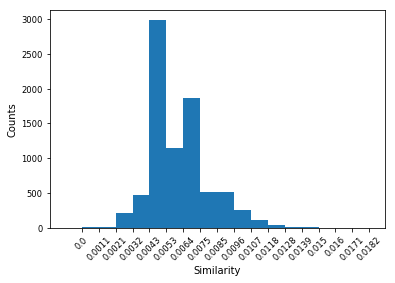

In [33]:
# view similarity distribution for first item
labels, values = zip(*Counter(row0).items())
ctr_idx = np.array(labels).argsort() # min to max
values = np.array(values)[ctr_idx]
labels = sorted(labels)
labels = [round(l,4) for l in labels]


indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=45)
plt.xlabel('Similarity')
plt.ylabel('Counts')
plt.savefig('similarity_dist')

In [34]:
# Lookup NPI given an index
top10npi = ind_df['NPI'].iloc[top10idx].values.astype(int)
# print("The top 10 most similar NPIs are:", top10npi)
# raw[raw.NPI.apply(lambda x: x in top10npi)]
top10npi

array([1962405415, 1295738656, 1326041542, 1679576128, 1043213598,
       1053314500, 1679576888, 1033112198, 1457354789, 1528061454])

In [ ]:
prettydf = df[['NPI', 'Entity Type Code', 'Provider Credential Text', 'Primary Tax Code', 'Provider Gender Code', \
    'Provider Business Mailing Address State Name', 'Is Sole Proprietor']].set_index('NPI')
prettydf = prettydf.join(code_df.set_index('Code'), on='Primary Tax Code', how='left')
prettydf.loc[top10npi]
# print(prettydf.columns)
# prettydf['Entity Type Code'].loc[top10npi].value_counts()
# prettydf['Provider Credential Text'].loc[top10npi].value_counts()
# prettydf['Primary Tax Code'].loc[top10npi].value_counts()
# prettydf['Provider Gender Code'].loc[top10npi].value_counts()
# prettydf['Provider Business Mailing Address State Name'].loc[top10npi].value_counts()
# prettydf['Is Sole Proprietor'].loc[top10npi].value_counts()
# prettydf['Classification'].loc[top10npi].value_counts()
# prettydf['Classification'].iloc[0] # 'Orthopaedic Surgery'

### Look at matches from MinHash LSH

In [48]:
import time

In [ ]:
start = time.time()
# local_file = '../data/npidata_20050523-20170813.csv'
s3_file = 'https://s3.amazonaws.com/gschoolcapstone/npidata_20050523-20170813.csv'
r = pd.read_csv(s3_file, usecols=cols, iterator=True, chunksize=2000, nrows=100000, true_values=["Y"], false_values=["N", "X"])  
print('Done reading, started concatonating. Time so far:', time.time()-start)
full_df = pd.concat(r, ignore_index=True)
print(time.time()-start)
full_df.head()

In [35]:
# Top 10 most similar to 1679576722: 
top10for1679576722 = [1679576722, 1770586224, 1881686475, 1548219223, 1780634568, \
                                    1194775270, 1104876366, 1336198001, 1336199561, 1376597120]
# Top 10 most similar to 1578547329: 
top10for1578547329 = [1184602823, 1962408021, 1962408898, 1083675995, 1437103702, \
                                    1740243138, 1144273475, 1437113578, 1821049750, 1922082676]

In [ ]:
joined = full_df[['NPI', 'Entity Type Code', 'Provider Credential Text', 'Provider Gender Code', \
                 'Provider Business Mailing Address State Name', 'Is Sole Proprietor', \
                 'Healthcare Provider Taxonomy Code_1', 'Healthcare Provider Primary Taxonomy Switch_1',
                 'Healthcare Provider Taxonomy Code_2', 'Healthcare Provider Primary Taxonomy Switch_2',
                 'Healthcare Provider Taxonomy Code_3', 'Healthcare Provider Primary Taxonomy Switch_3',
                 'Healthcare Provider Taxonomy Code_4', 'Healthcare Provider Primary Taxonomy Switch_4',
                 'Healthcare Provider Taxonomy Code_5', 'Healthcare Provider Primary Taxonomy Switch_5',
                 'Healthcare Provider Taxonomy Code_6', 'Healthcare Provider Primary Taxonomy Switch_6',
                 'Healthcare Provider Taxonomy Code_7', 'Healthcare Provider Primary Taxonomy Switch_7',
                 'Healthcare Provider Taxonomy Code_8', 'Healthcare Provider Primary Taxonomy Switch_8',
                 'Healthcare Provider Taxonomy Code_9', 'Healthcare Provider Primary Taxonomy Switch_9',
                 'Healthcare Provider Taxonomy Code_10', 'Healthcare Provider Primary Taxonomy Switch_10',
                 'Healthcare Provider Taxonomy Code_11', 'Healthcare Provider Primary Taxonomy Switch_11',
                 'Healthcare Provider Taxonomy Code_12', 'Healthcare Provider Primary Taxonomy Switch_12',
                 'Healthcare Provider Taxonomy Code_13', 'Healthcare Provider Primary Taxonomy Switch_13',
                 'Healthcare Provider Taxonomy Code_14', 'Healthcare Provider Primary Taxonomy Switch_14',
                 'Healthcare Provider Taxonomy Code_15', 'Healthcare Provider Primary Taxonomy Switch_15']]\
                 .set_index('NPI')

In [ ]:
joined = joined.join(code_df.set_index('Code'), on='Primary Tax Code', how='left')
# joined['Entity Type Code'].loc[top10npi].value_counts()
# joined['Provider Credential Text'].loc[top10npi].value_counts()
# joined['Primary Tax Code'].loc[top10npi].value_counts()
# joined['Provider Gender Code'].loc[top10npi].value_counts()
# joined['Provider Business Mailing Address State Name'].loc[top10npi].value_counts()
# joined['Is Sole Proprietor'].loc[top10npi].value_counts()
# joined['Classification'].loc[top10npi].value_counts()
# joined['Classification'].iloc[0] # 'Orthopaedic Surgery'
joined.loc[top10for1578547329]

### Pairwise similiarity/distance measures  
https://docs.scipy.org/doc/scipy/reference/spatial.distance.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

In [ ]:
# Lets fill in those empty spaces with cosine similarities
# Loop through the columns

ibs = np.array([m,n])
ibs = pd.DataFrame()
distance_funct = jaccard

for i in range(0,len(ibs.columns)):
    for j in range(0,len(ibs.columns)):
        if i >= j:
          ibs.iloc[i,j] = 1 - distance_func(df.iloc[:,i],df.iloc[:,j])

In [ ]:
# Create a placeholder items for closes neighbours to an item
data_neighbours = pd.DataFrame(index=ibs.columns,columns=range(1,11))

# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(ibs.columns)):
    data_neighbours.iloc[i,:10] = ibs.iloc[0:,i].order(ascending=False)[:10].index

In [ ]:
# Top 10 most similiar for first 6 items
data_neighbours.head(6).iloc[:6,2:11]